In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
plt.style.use('ggplot')

df_train = pd.read_csv("C:/Users/eisah/OneDrive/Desktop/AI + Python/train_dataset_final1.csv")
df_train.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [7]:
df_train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [11]:
# Fill missing values in 'age' with the mean and convert to int
df_train['age'] = df_train['age'].fillna(value=df_train['age'].mean())
df_train['age'] = df_train['age'].astype('int64')

# Convert specific columns to object type (categorical)
df_train[['marriage', 'sex', 'education']] = df_train[['marriage', 'sex', 'education']].astype('object')

# Drop the 'Customer_ID' column
df_train = df_train.drop(columns=['Customer_ID'])

# Show updated DataFrame info
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25247 non-null  object 
 1   sex                 25247 non-null  object 
 2   education           25247 non-null  object 
 3   LIMIT_BAL           25247 non-null  int64  
 4   age                 25247 non-null  int64  
 5   pay_0               25247 non-null  int64  
 6   pay_2               25247 non-null  int64  
 7   pay_3               25247 non-null  int64  
 8   pay_4               25247 non-null  int64  
 9   pay_5               25247 non-null  int64  
 10  pay_6               25247 non-null  int64  
 11  Bill_amt1           25247 non-null  float64
 12  Bill_amt2           25247 non-null  float64
 13  Bill_amt3           25247 non-null  float64
 14  Bill_amt4           25247 non-null  float64
 15  Bill_amt5           25247 non-null  float64
 16  Bill

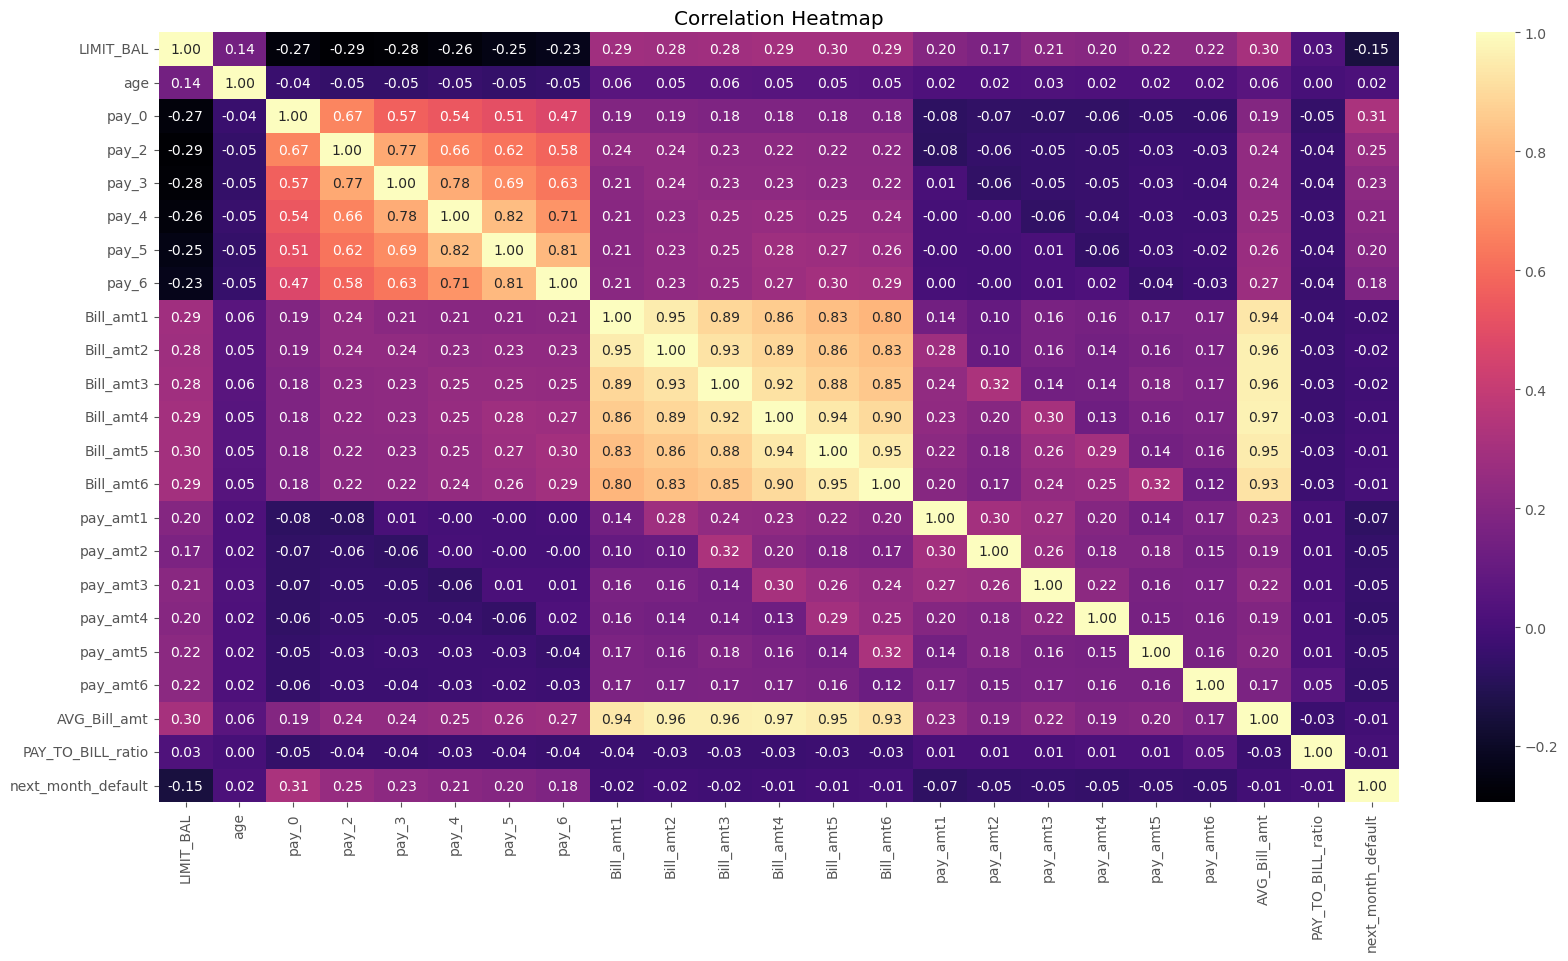

In [13]:
# EDA - Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix only for numerical columns
corr_matrix = df_train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap')
plt.show()


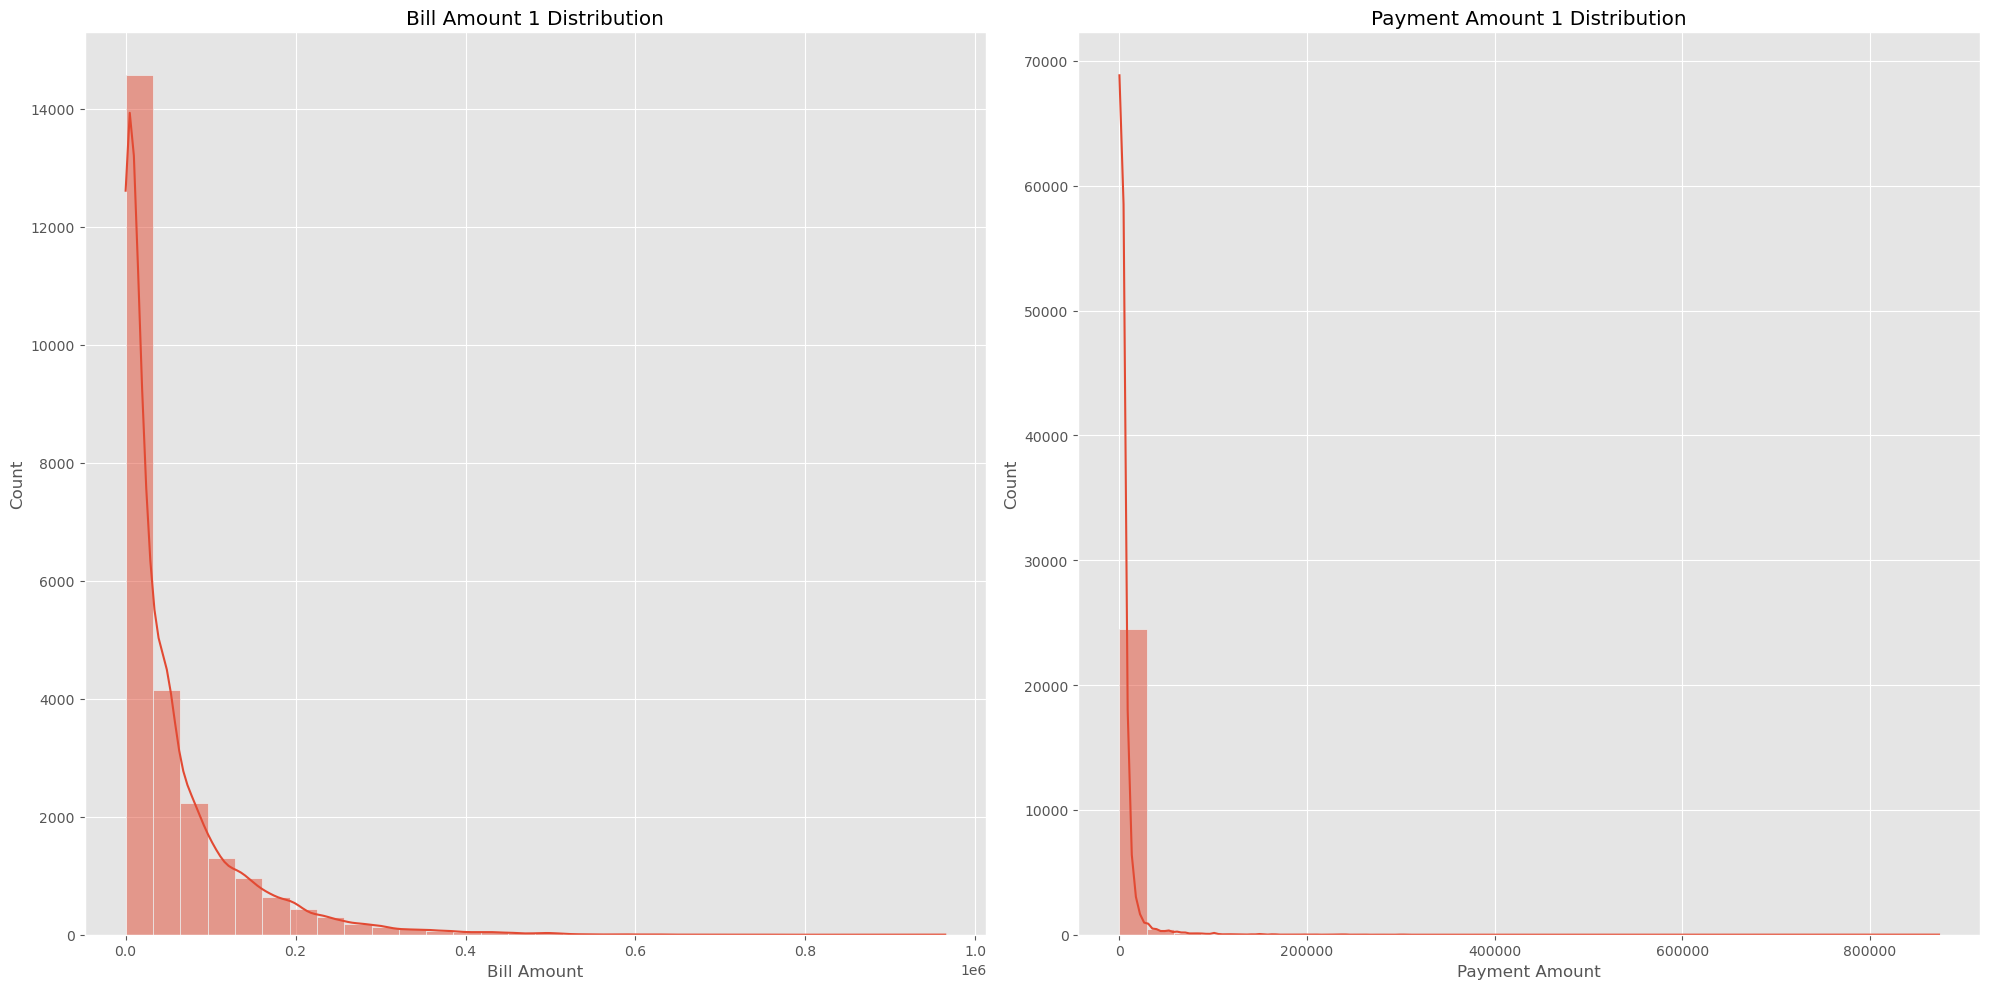

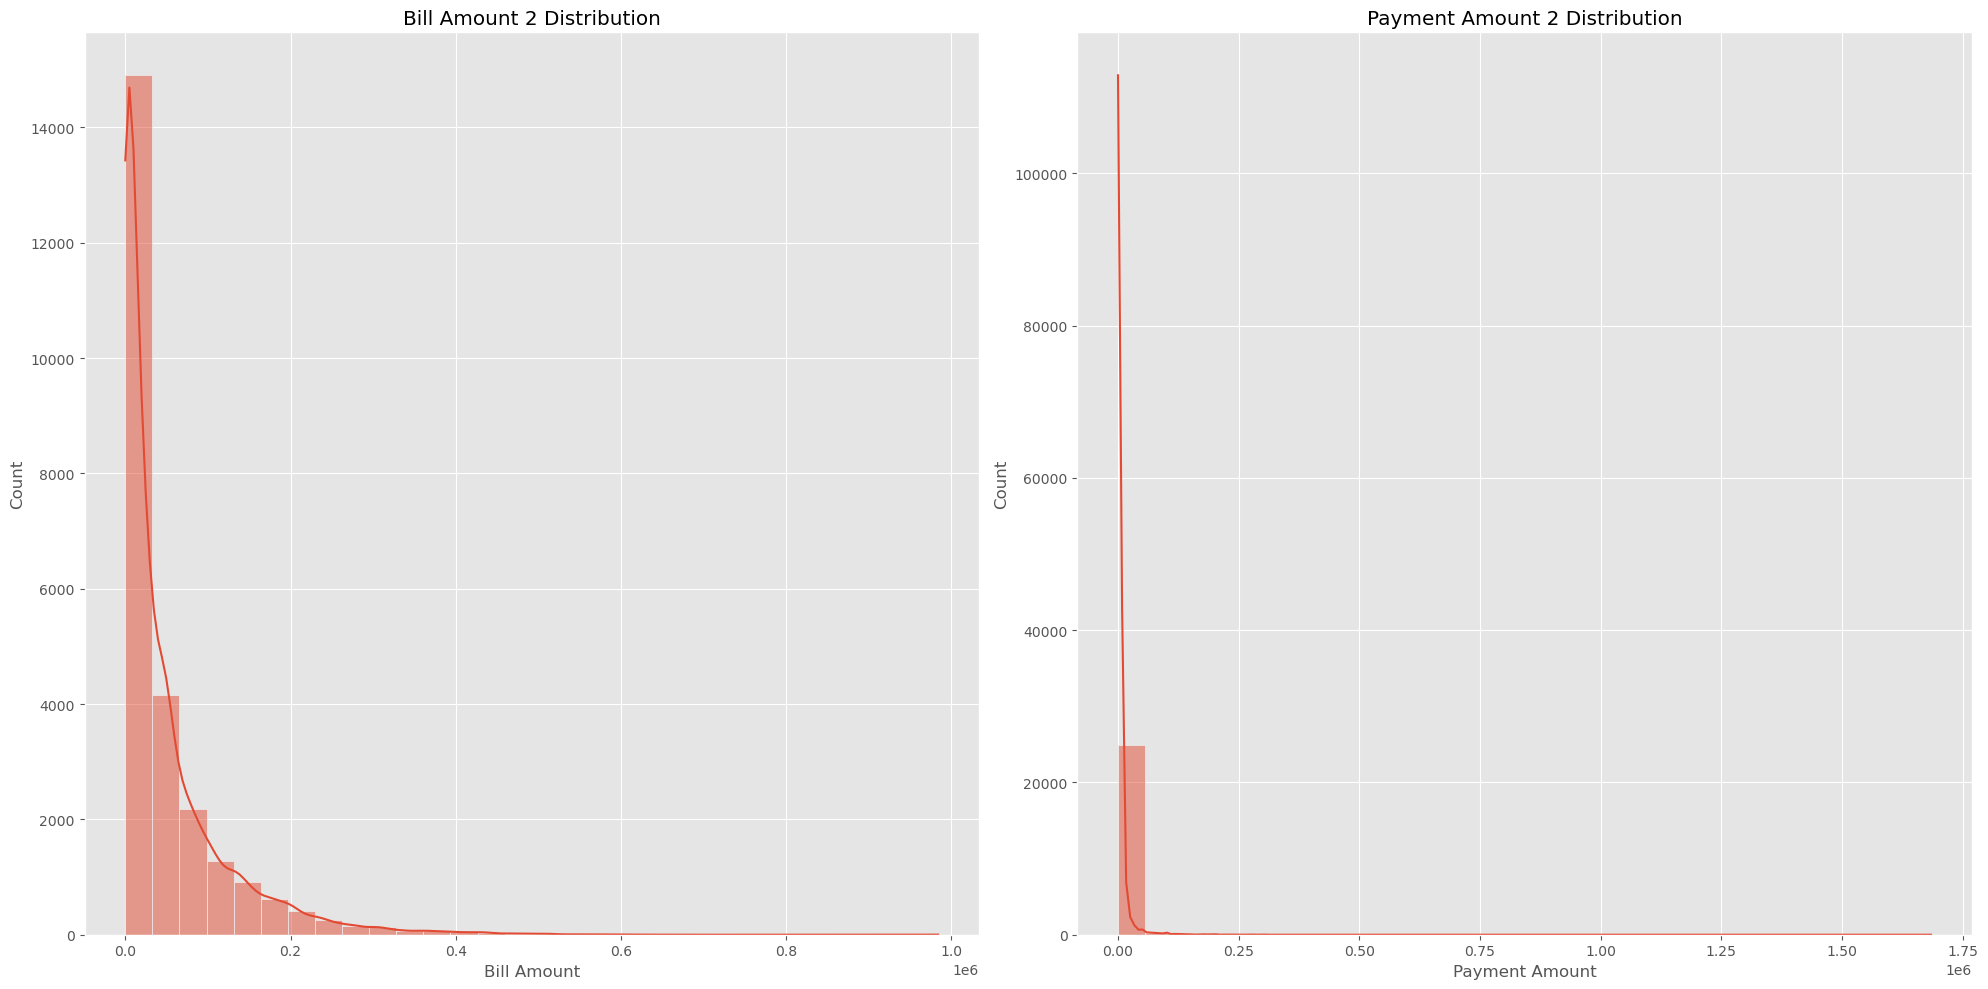

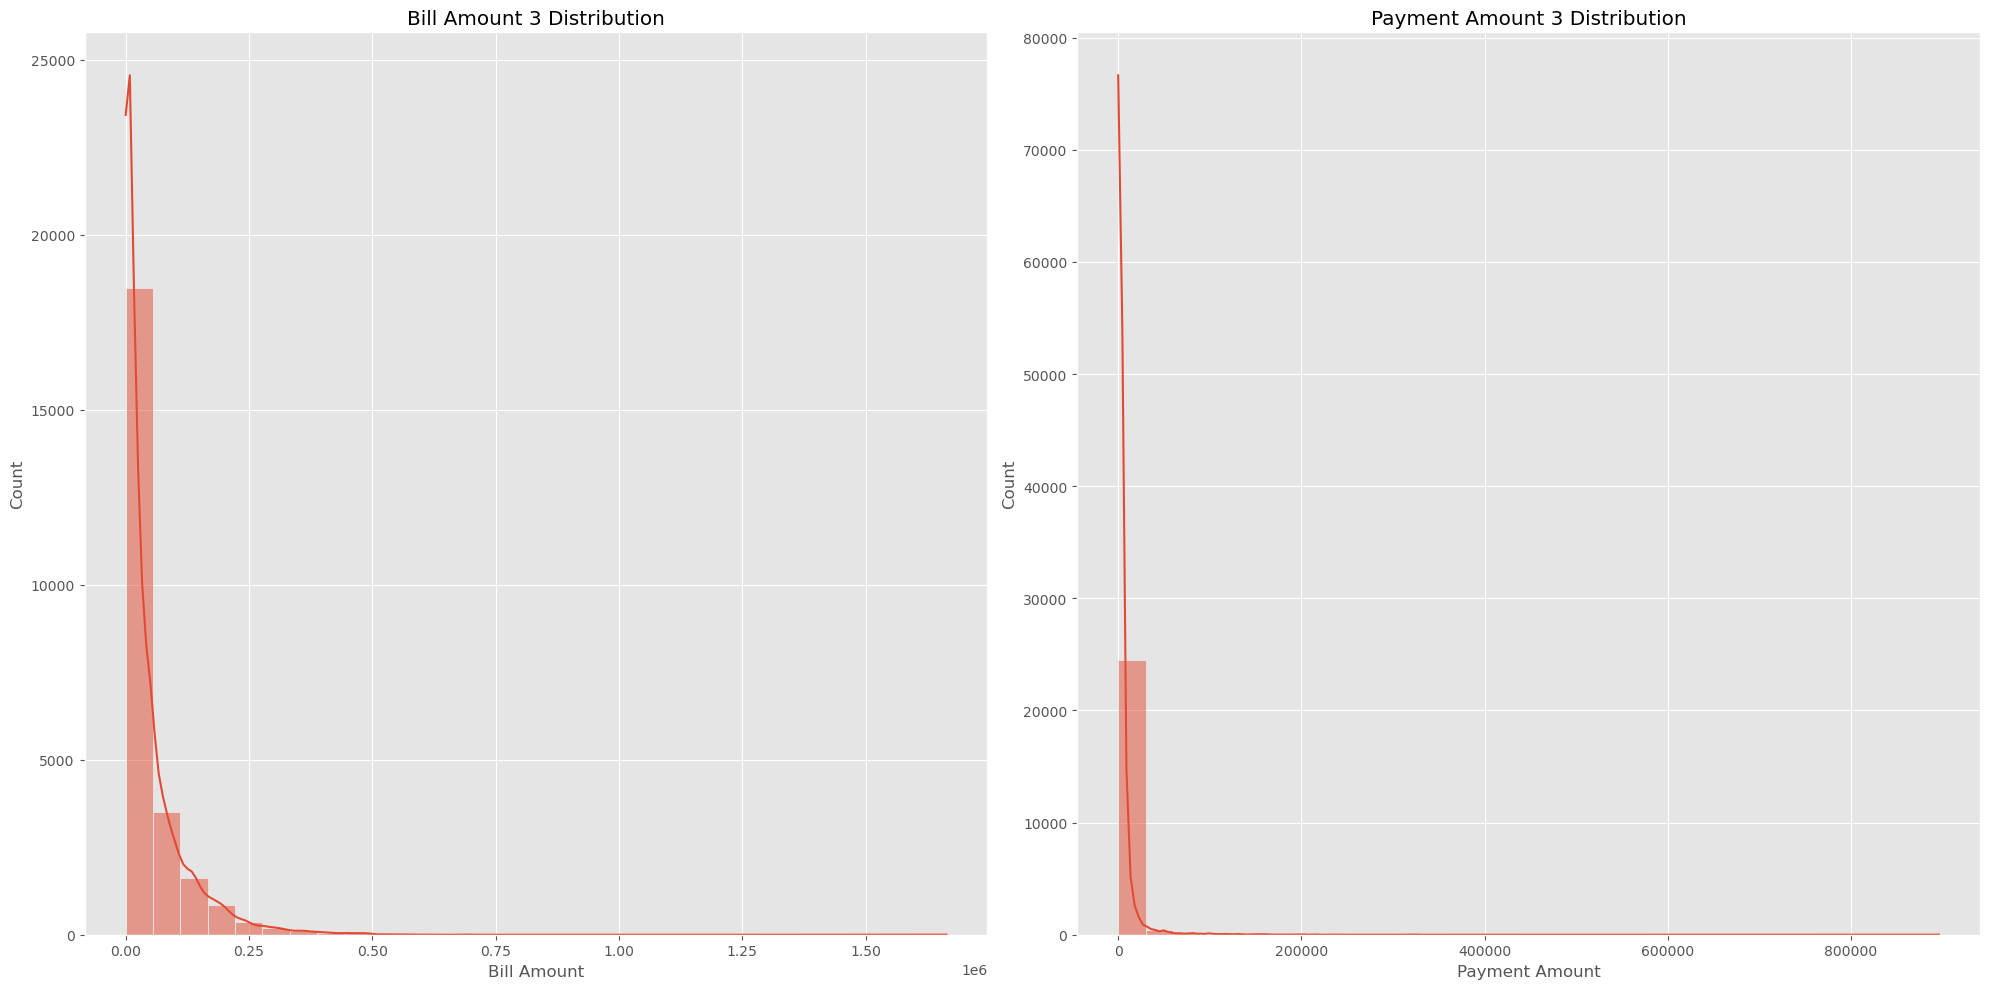

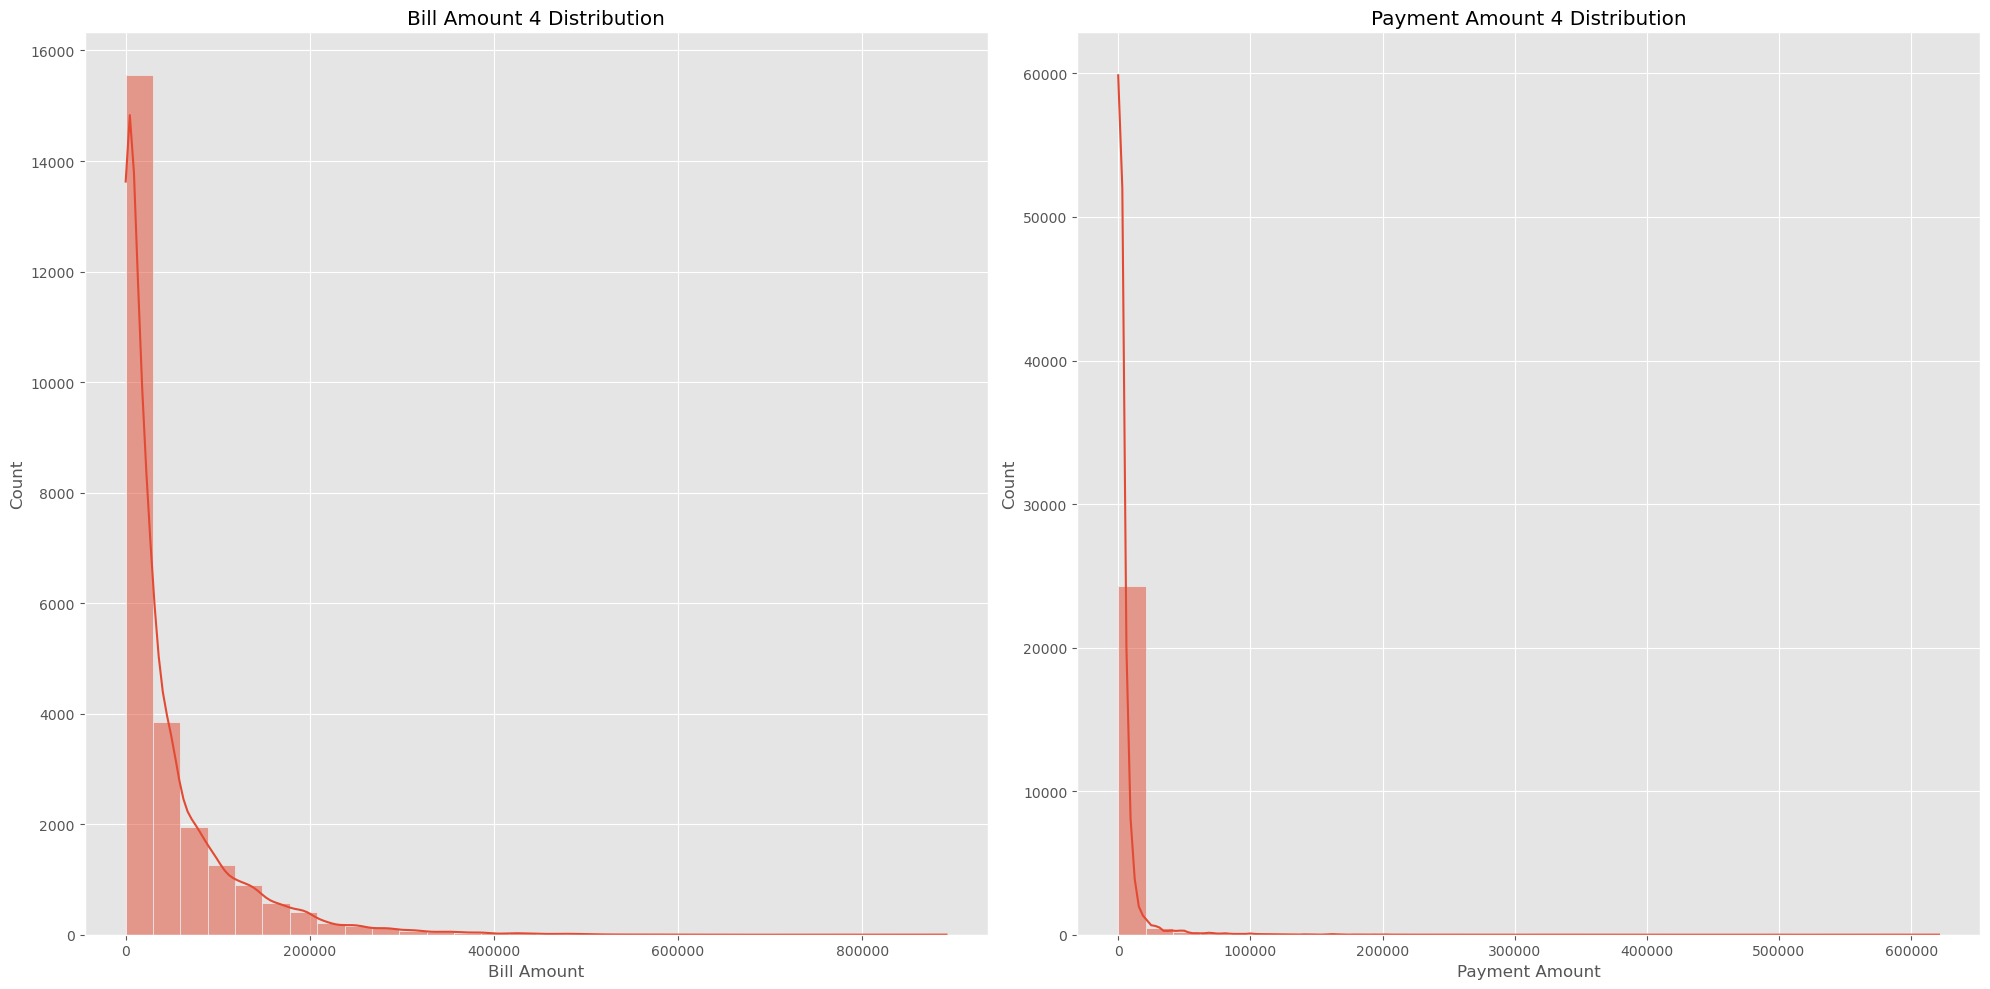

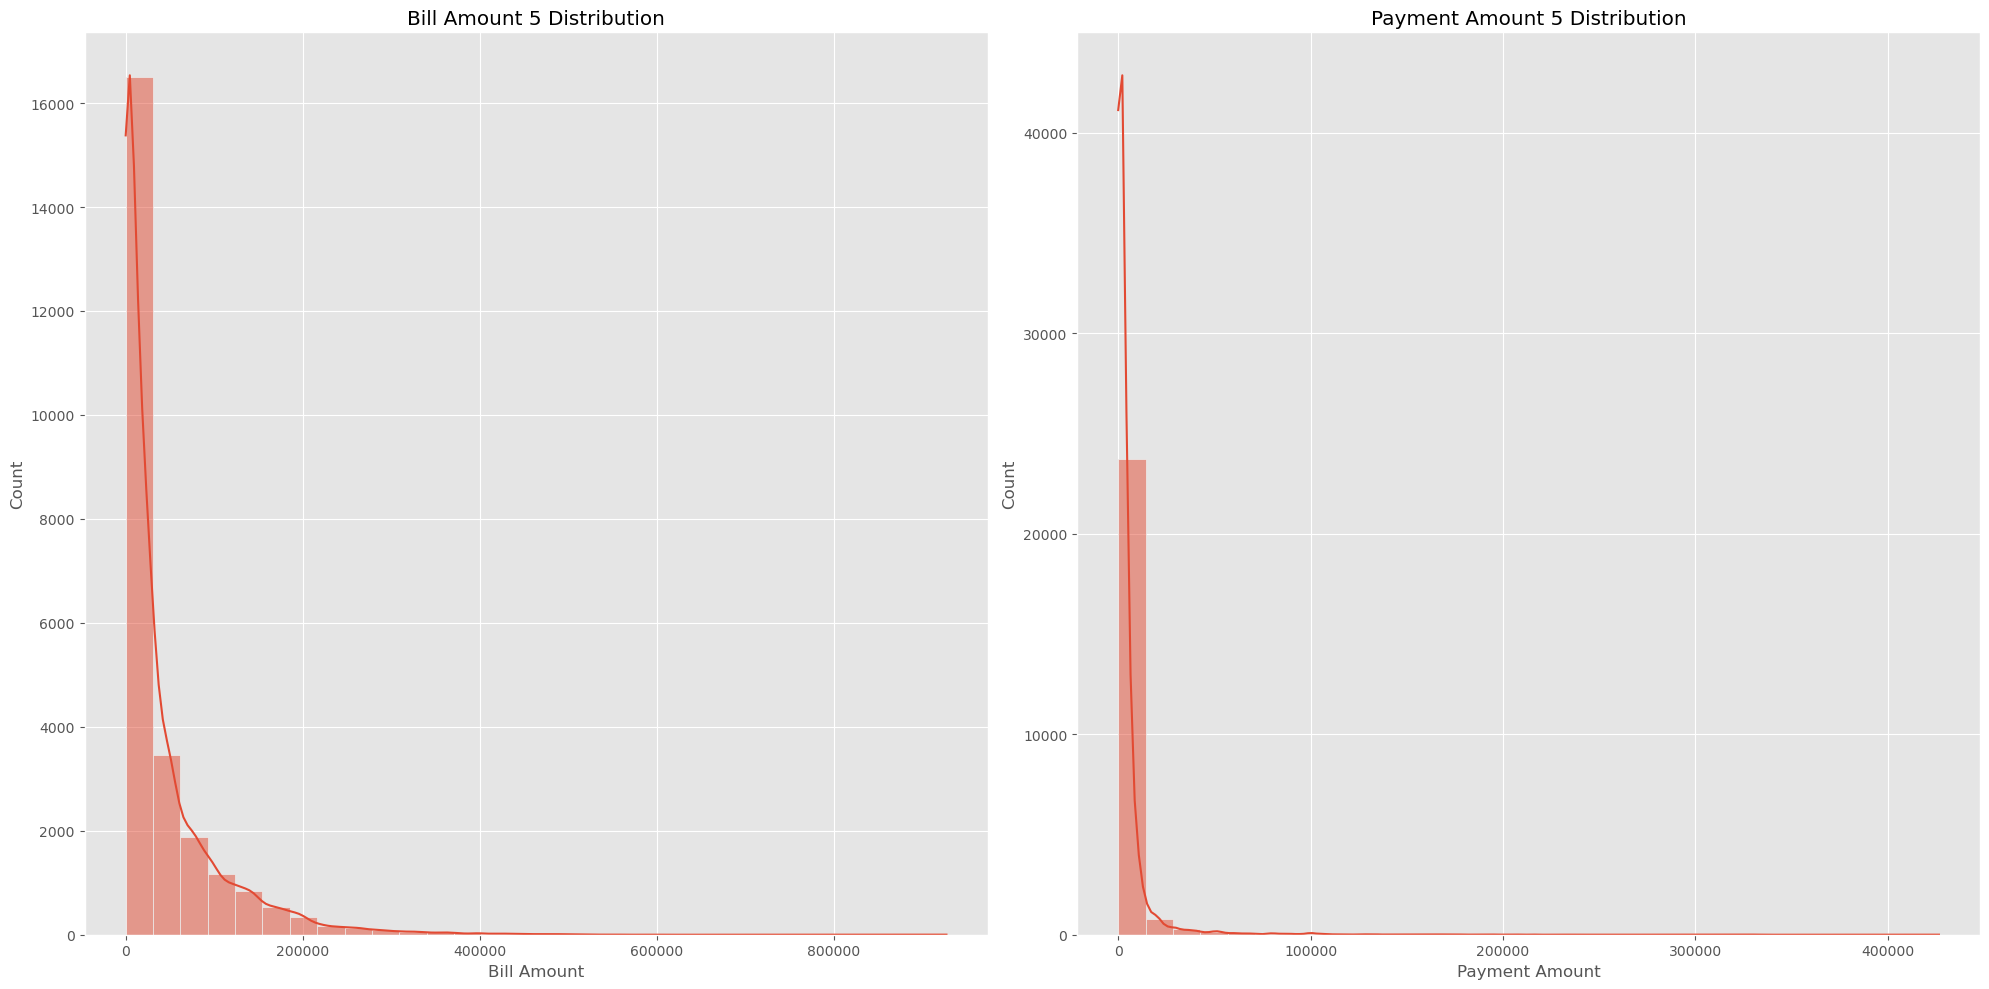

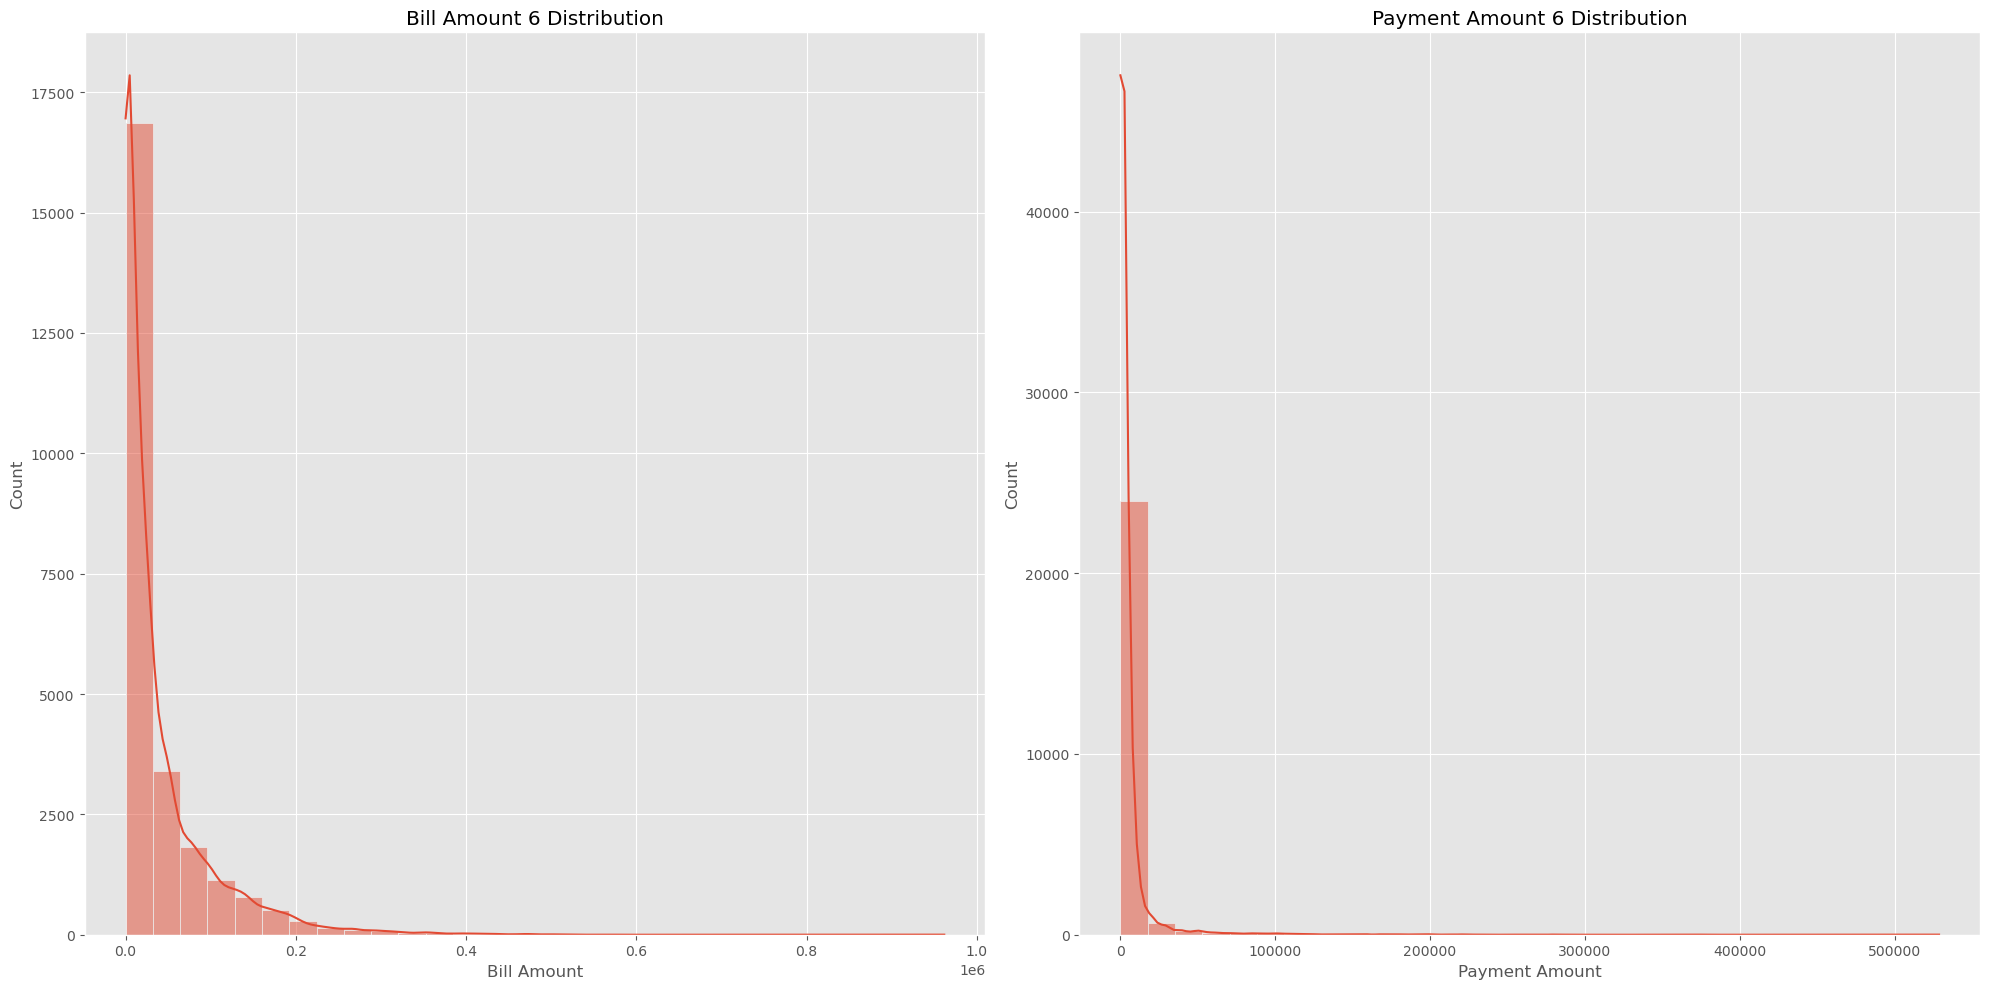

In [17]:
import warnings
warnings.filterwarnings("ignore")

for i in range(1, 7):
    plt.figure(figsize=(20, 10))
    
    # Plot Bill Amount Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[f'Bill_amt{i}'], bins=30, kde=True)
    plt.title(f'Bill Amount {i} Distribution')
    plt.xlabel('Bill Amount')
    plt.ylabel('Count')
    
    # Plot Payment Amount Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_train[f'pay_amt{i}'], bins=30, kde=True)
    plt.title(f'Payment Amount {i} Distribution')
    plt.xlabel('Payment Amount')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


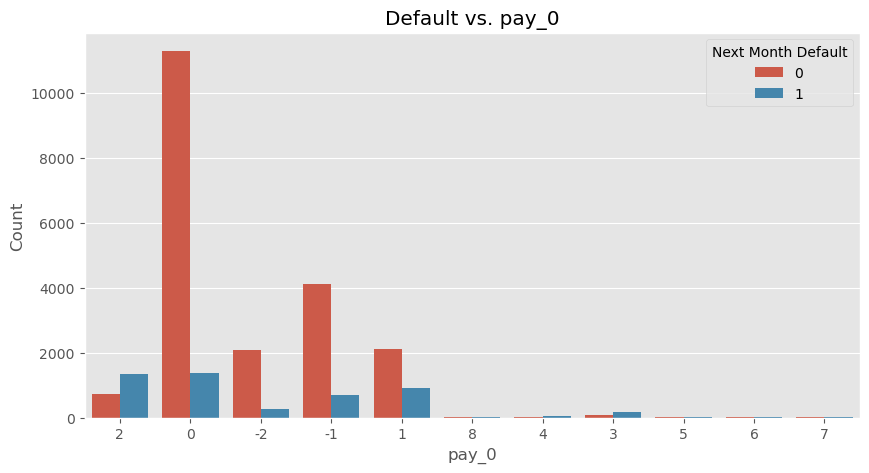

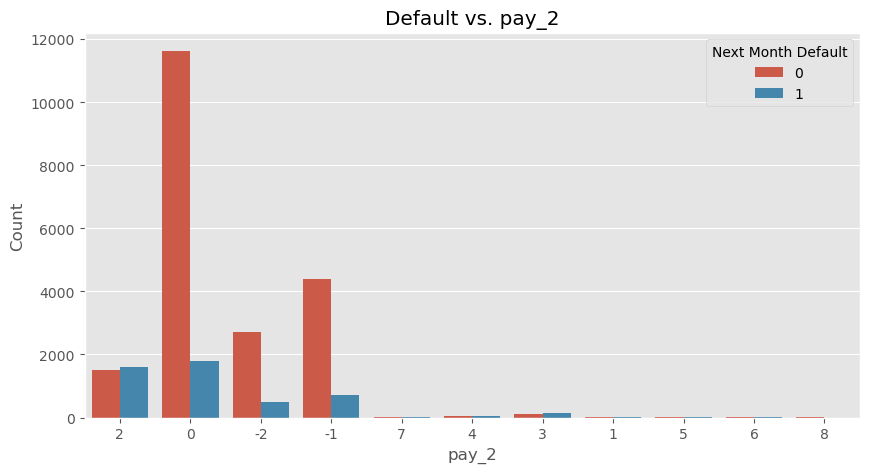

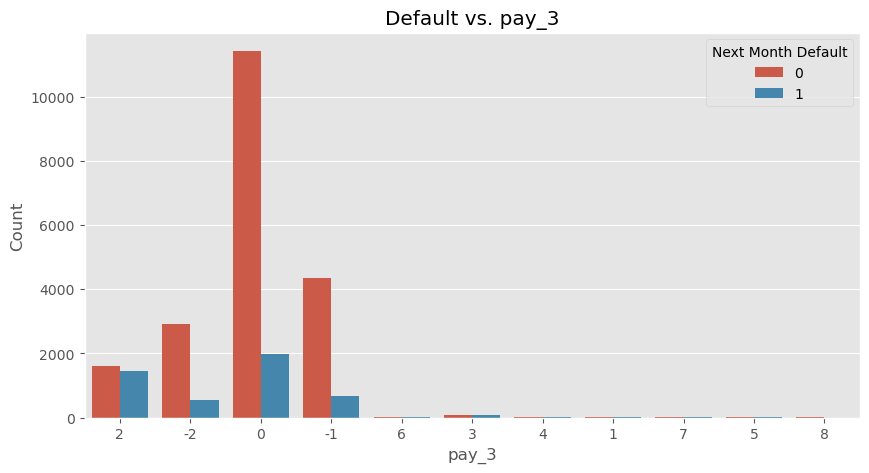

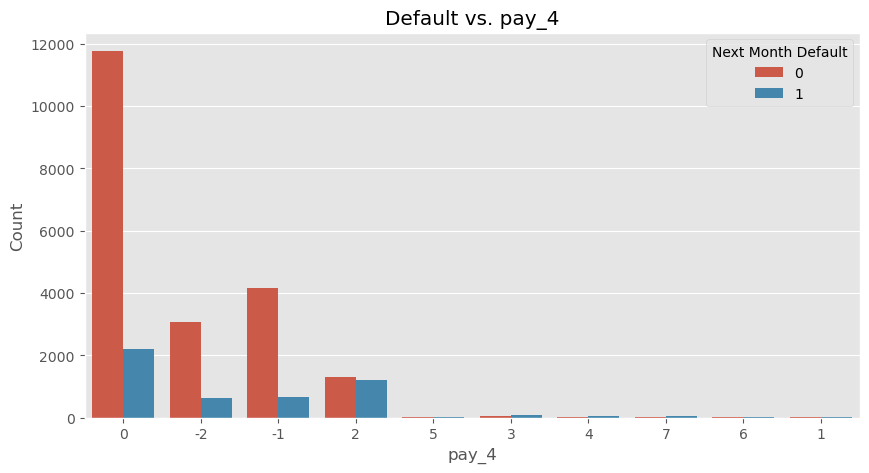

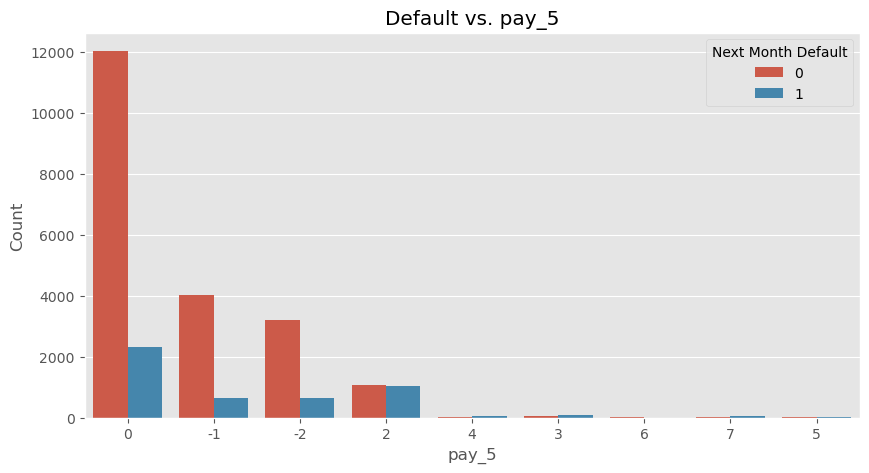

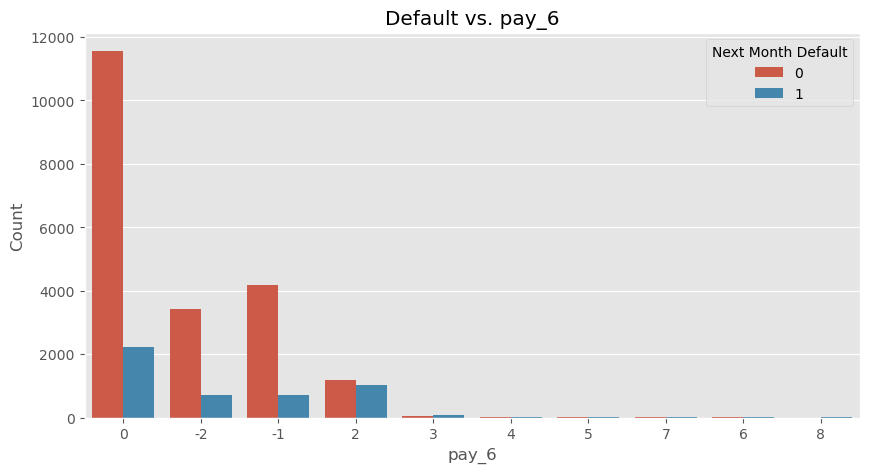

In [19]:
payment_history_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in payment_history_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_train[col].astype(str), hue=df_train['next_month_default'].astype(str), data=df_train)
    plt.title(f'Default vs. {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Next Month Default")
    plt.show()


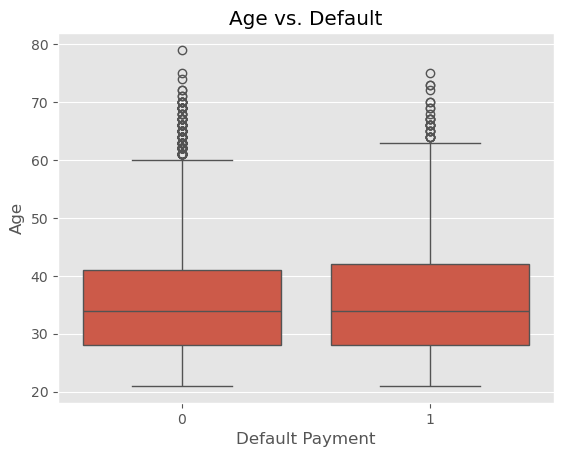

In [23]:
sns.boxplot(x = 'next_month_default', y = 'age', data = df_train)
plt.title('Age vs. Default')
plt.xlabel('Default Payment')
plt.ylabel('Age')
plt.show()


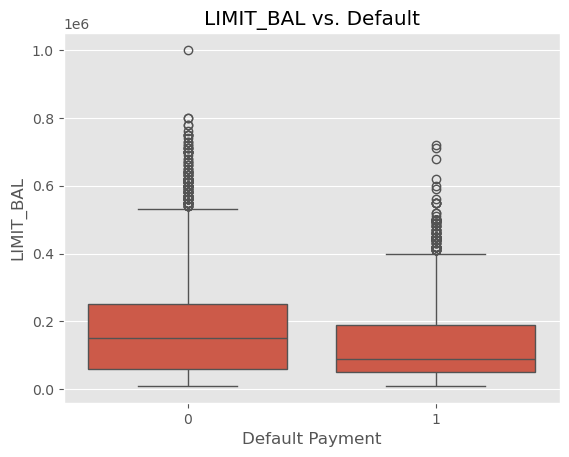

In [25]:
sns.boxplot(x = 'next_month_default', y = 'LIMIT_BAL', data = df_train)
plt.title('LIMIT_BAL vs. Default')
plt.xlabel('Default Payment')
plt.ylabel('LIMIT_BAL')
plt.show()

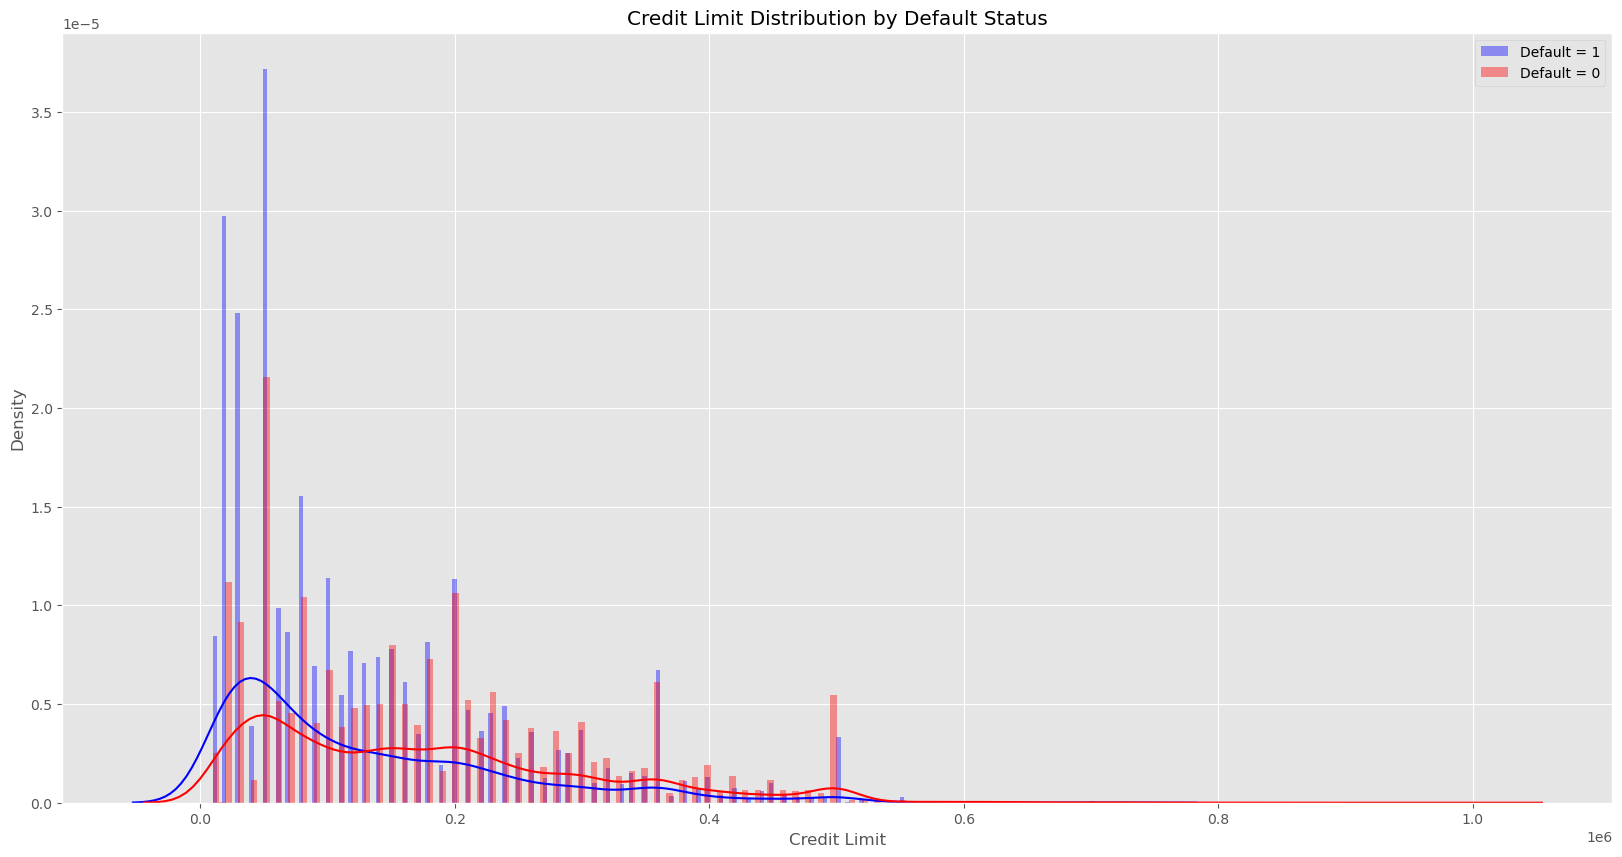

In [27]:
import warnings
warnings.filterwarnings("ignore")

# Split LIMIT_BAL by default status
class_0 = df_train.loc[df_train['next_month_default'] == 0]['LIMIT_BAL']
class_1 = df_train.loc[df_train['next_month_default'] == 1]['LIMIT_BAL']

# Plot distribution
plt.figure(figsize=(20, 10))
plt.title('Credit Limit Distribution by Default Status')
sns.distplot(class_1, kde=True, bins=200, color='blue', label='Default = 1')
sns.distplot(class_0, kde=True, bins=200, color='red', label='Default = 0')
plt.xlabel('Credit Limit')
plt.ylabel('Density')
plt.legend()
plt.show()


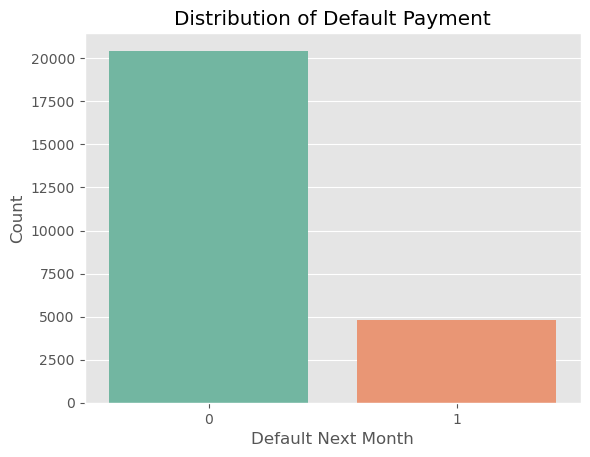

In [29]:
sns.countplot(x='next_month_default', data=df_train, palette='Set2') 
plt.title('Distribution of Default Payment')
plt.xlabel('Default Next Month')
plt.ylabel('Count')
plt.show()


In [31]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Calculate delinquency count: number of months with delay > 0
df_train["deliquency_count"] = df_train[pay_cols].apply(lambda row: sum(row > 0), axis=1)

# Calculate max delay in credit payments across the months
df_train["max_delay"] = df_train[pay_cols].max(axis=1)

# Average payment amount over last 6 months
df_train['avg_pay_amt'] = df_train[[f'pay_amt{i}' for i in range(1,7)]].mean(axis=1)

# Calculate utilization ratio: average bill amount / credit limit (add 1 to avoid division by zero)
df_train['utilization_ratio'] = df_train['AVG_Bill_amt'] / (df_train['LIMIT_BAL'] + 1)


In [33]:
df_train.info

<bound method DataFrame.info of       marriage sex education  LIMIT_BAL  age  pay_0  pay_2  pay_3  pay_4  \
0            2   0         2      60000   25      2      2      2      0   
1            2   1         1     290000   24      0      0     -2     -2   
2            1   0         2     180000   63      0      0      0      0   
3            1   1         2     210000   43      0      0      0      0   
4            2   0         1     280000   32     -2     -2     -2     -2   
...        ...  ..       ...        ...  ...    ...    ...    ...    ...   
25242        1   1         2      90000   33      0      0      0      0   
25243        1   0         2      60000   49      0      0      0      0   
25244        2   0         1     120000   31     -1     -1     -1     -1   
25245        1   1         4     390000   40      0      0      0      0   
25246        1   1         2     160000   58     -1     -1     -1     -1   

       pay_5  ...  pay_amt4  pay_amt5  pay_amt6  AVG_Bi

In [35]:
from sklearn.utils import resample

# Separate majority (0) and minority (1) classes
df_majority = df_train[df_train['next_month_default'] == 0]
df_minority = df_train[df_train['next_month_default'] == 1]

# Downsample majority class to match minority class size
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=42
)

# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the resulting balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(df_balanced['next_month_default'].value_counts())


next_month_default
1    4807
0    4807
Name: count, dtype: int64


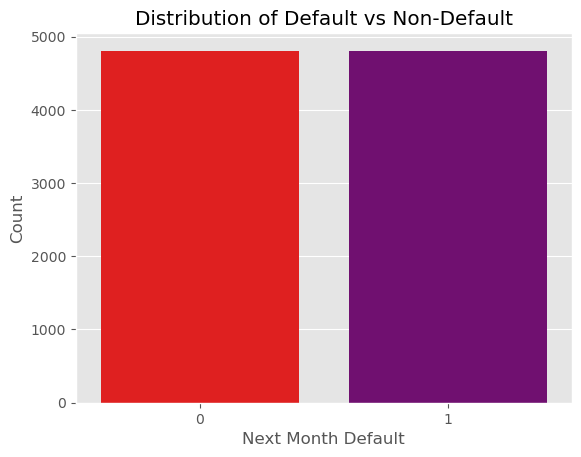

In [41]:
sns.countplot(x='next_month_default', data=df_balanced, palette={'0': 'red', '1': 'purple'})

plt.title('Distribution of Default vs Non-Default')
plt.xlabel('Next Month Default')
plt.ylabel('Count')
plt.show()


In [43]:
# Separate features and target variable
X = df_balanced.drop('next_month_default', axis=1)
y = df_balanced['next_month_default']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
df_balanced.shape

(9614, 30)

In [47]:
X_train.shape

(7691, 29)

In [49]:
np.isnan(X_train_scaled).sum()

0

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import fbeta_score

# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000))  # optional class weighting
])

# Fit model
pipeline.fit(X_train_scaled, y_train)

y_prob = pipeline.predict_proba(X_test_scaled)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

f2_score = fbeta_score(y_test, y_pred, beta=2)

# Step 7: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

Accuracy: 0.6843473738949558
Confusion Matrix:
 [[662 311]
 [296 654]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       973
           1       0.68      0.69      0.68       950

    accuracy                           0.68      1923
   macro avg       0.68      0.68      0.68      1923
weighted avg       0.68      0.68      0.68      1923

f2 score:
 0.6862539349422875


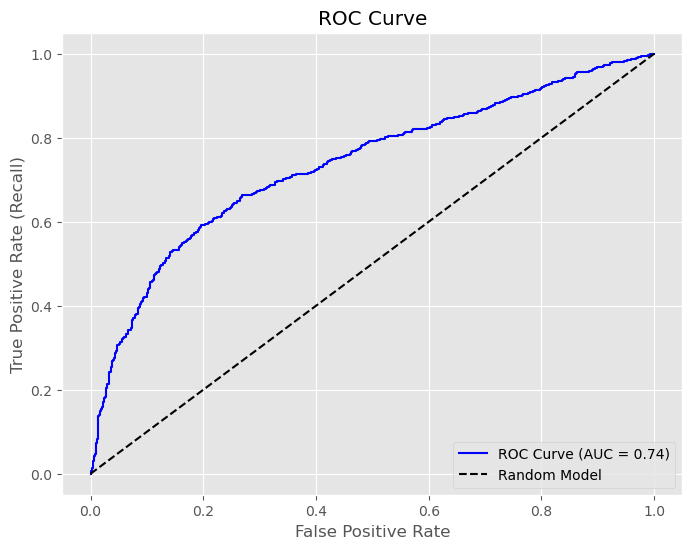

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = pipeline.predict_proba(X_test_scaled)[:, 1]

#calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 2: Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  
    ('model', DecisionTreeClassifier(random_state=42)) ])

# Fit model
pipeline.fit(X_train_scaled, y_train)

# Predict
y_prob = pipeline.predict_proba(X_test_scaled)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

# Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

Accuracy: 0.6177847113884556
Confusion Matrix:
 [[613 360]
 [375 575]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.63       973
           1       0.61      0.61      0.61       950

    accuracy                           0.62      1923
   macro avg       0.62      0.62      0.62      1923
weighted avg       0.62      0.62      0.62      1923

f2 score:
 0.6071805702217529


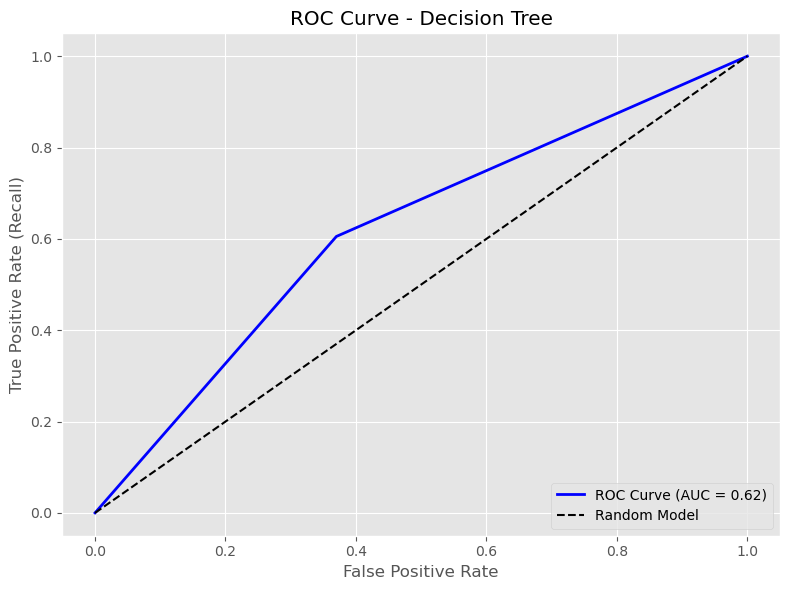

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities (for the positive class)
y_prob = pipeline.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
!pip install xgboost

In [61]:
#XG BOOST
from xgboost import XGBClassifier
# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # Still useful for some numeric stability
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Fit model
pipeline.fit(X_train_scaled, y_train)

# Predict
y_prob = pipeline.predict_proba(X_test_scaled)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

# Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

Accuracy: 0.6708268330733229
Confusion Matrix:
 [[609 364]
 [269 681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       973
           1       0.65      0.72      0.68       950

    accuracy                           0.67      1923
   macro avg       0.67      0.67      0.67      1923
weighted avg       0.67      0.67      0.67      1923

f2 score:
 0.7027863777089783


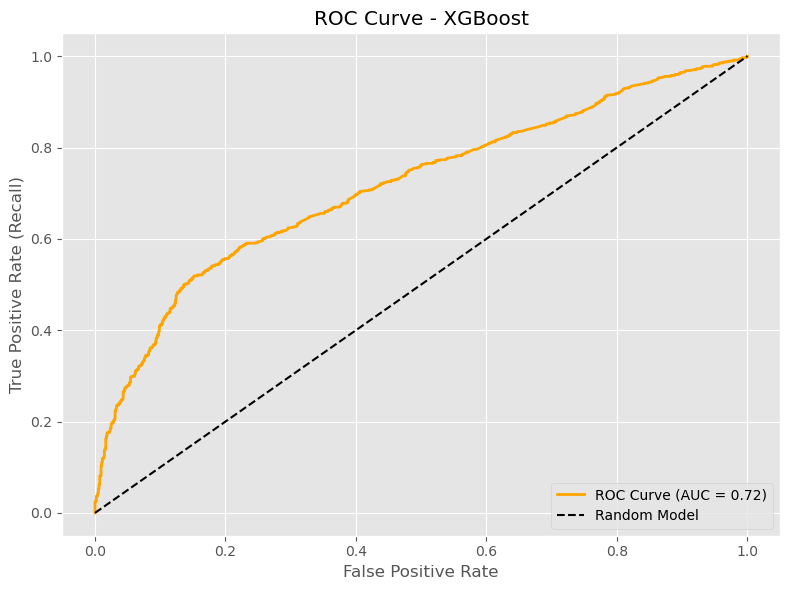

In [63]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
!pip install lightgbm

In [67]:
from lightgbm import LGBMClassifier

pipeline_lgbm = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # optional for tree models
    ('model', LGBMClassifier(random_state=42))
])

# Fit model
pipeline_lgbm.fit(X_train_scaled, y_train)

# Predict
y_prob = pipeline_lgbm.predict_proba(X_test_scaled)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

# Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

[LightGBM] [Info] Number of positive: 3857, number of negative: 3834
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 7691, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501495 -> initscore=0.005981
[LightGBM] [Info] Start training from score 0.005981
Accuracy: 0.6853874154966199
Confusion Matrix:
 [[604 369]
 [236 714]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67       973
           1       0.66      0.75      0.70       950

    accuracy                           0.69      1923
   macro avg       0.69      0.69      0.68      1923
weighted avg       0.69      0.69      0.68      1923

f2 score:
 0.7311079254556625


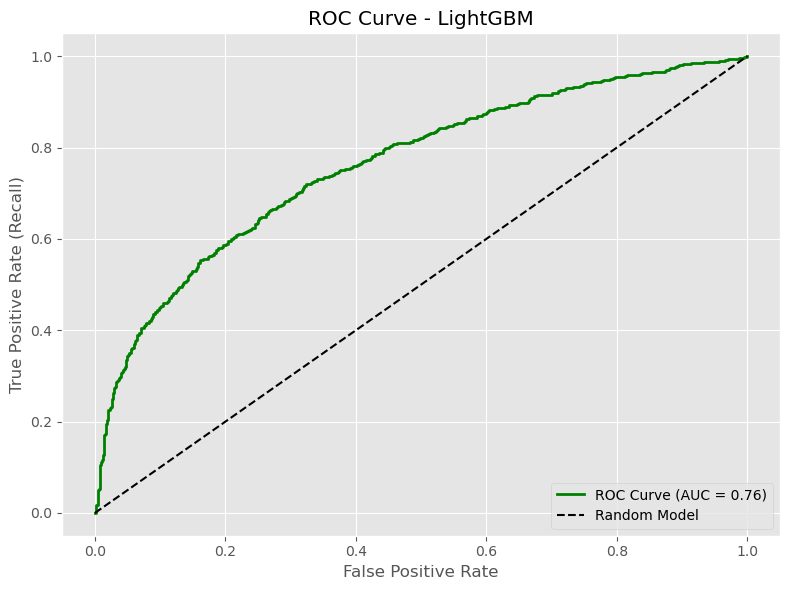

In [69]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')  # Diagonal line for baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
import pandas as pd

# Load validation dataset
val_df = pd.read_csv(r"C:/Users/eisah/OneDrive/Desktop/AI + Python/validate_dataset_final.csv")

# Separate customer IDs for submission
customer_ids = val_df['Customer_ID']

# Drop Customer_ID from features
X_val_features = val_df.drop(columns=['Customer_ID'])

# Define payment columns
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Feature engineering on validation data
X_val_features["deliquency_count"] = X_val_features[pay_cols].apply(lambda row: sum(row > 0), axis=1)
X_val_features["max_delay"] = X_val_features[pay_cols].max(axis=1)
X_val_features['avg_pay_amt'] = X_val_features[[f'pay_amt{i}' for i in range(1, 7)]].mean(axis=1)

# Corrected: Use validation data's LIMIT_BAL for utilization ratio
X_val_features['utilization_ratio'] = X_val_features['AVG_Bill_amt'] / (X_val_features['LIMIT_BAL'] + 1)

# Predict using your trained LightGBM pipeline/model
y_val_pred = pipeline_lgbm.predict(X_val_features)

# Prepare result_model DataFrame
Result_model= Result_model = pd.DataFrame({
    'Customer': customer_ids,
    'next_month_default': y_val_pred.astype(int)  
})

# Save result_model CSV
Result_model.to_csv(r'C:/Users/eisah/OneDrive/Desktop/AI + Python/result_model.csv', index=False)

